# Maestría en Inteligencia Artificial Aplicada 

## Curso: Proyecto Integrador (Grupo 10) 

## Avance 1. Análisis exploratorio de datos
<br />

### Profesor titular  
#### Dra. Grettel Barceló Alonso 
#### Dr. Luis Eduardo Falcón Morales  
<br />

<table>
<tr>
    <th colspan="2">Equipo 19: Los Californios I</th>
</tr>
<tr>
    <td>Ernesto Zapata Garza</td><td>A00915255</td>
</tr>
<tr>
    <td>Rafael García Domínguez</td><td>A01328974</td>
</tr>
<tr>
    <td>Erik López Hernández</td><td>A00458875</td>
</tr>
</table>
<br />

##### 4 de mayo de 2025

El objetivo de este notebook es realizar un análisis exploratorio completo del guion de la serie <b>Los Californios</b>, con el fin de identificar patrones narrativos, personajes clave, agrupaciones temáticas y otras variables que permitan usar IA generativa en la producción de un tráiler audiovisual.

## Instalaciones necesarias

In [1]:
!pip install spacy


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     - -------------------------------------- 1.3/42.3 MB 9.6 MB/s eta 0:00:05
     --- ------------------------------------ 3.9/42.3 MB 11.8 MB/s eta 0:00:04
     ----- ---------------------------------- 5.8/42.3 MB 10.7 MB/s eta 0:00:04
     ------- -------------------------------- 7.9/42.3 MB 10.4 MB/s eta 0:00:04
     --------- ----------------------------- 10.0/42.3 MB 10.2 MB/s eta 0:00:04
     ----------- --------------------------- 12.1/42.3 MB 10.1 MB/s eta 0:00:04
     ------------- ------------------------- 14.2/42.3 MB 10.1 MB/s eta 0:00:03
     -------------- ------------------------ 16.3/42.3 MB 10.0 MB/s eta 0:00:03
     ---------------- ---------------------- 18.4/42.3 MB 10.1 MB/s eta 0:00:03
     ------------------- ------------------- 20.7/42.3 MB 10.1 MB/s eta 0:00:03
     --------------------- ----------------- 23.1/42.3 MB 10.2 MB/s eta 0:00:02
     ----------------------- --------------- 25.2


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install transformers


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install torch


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install huggingface_hub[hf_xet]


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip3 install emoji==0.6.0


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install deep-translator


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install sentence_transformers


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Construcción inicial del dataframe

In [9]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import spacy
from collections import Counter

# Cargar modelo de NLP
nlp = spacy.load('es_core_news_md')

In [10]:
# Carga y limpieza del guion
ruta_guion = Path('../data/LosCaliforniosScript.txt')
with open(ruta_guion, encoding='utf-8') as f:
    guion_crudo = f.read()

# Separación preliminar por escenas
escenas = re.split(r'\n\(\d+\)\s+(EXT\.|INT\.)', guion_crudo)
escenas = [e.strip() for e in escenas if len(e.strip()) > 100]

df = pd.DataFrame({'escena_texto': escenas})
df['num_palabras'] = df['escena_texto'].apply(lambda x: len(x.split()))
df.head()

,escena_texto,num_palabras
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,5665
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,594
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",1069
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",187
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,97


In [11]:
# Extracción de personajes con NLP
df['doc'] = df['escena_texto'].apply(nlp)
df['personajes'] = df['doc'].apply(lambda d: list(set([ent.text for ent in d.ents if ent.label_ == 'PER'])))

from collections import Counter

personajes_todos = df['personajes'].explode()
conteo_personajes = Counter(personajes_todos)

personajes_filtrados = [p for p, c in conteo_personajes.items() if c >= 5 and len (p.split()) <= 3]
df['personajes_filtrados'] = df['personajes'].apply(lambda lista: [p for p in lista if p in personajes_filtrados])

df[['escena_texto', 'personajes_filtrados']].head()

,escena_texto,personajes_filtrados
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,"[Josefa Ramos, De Anza, Aldara, Pablo, Queréta..."
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,[]
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...","[Peralta, Zoey, Luis María, San Antonio, Pablo]"
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",[Luis María]
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,[]


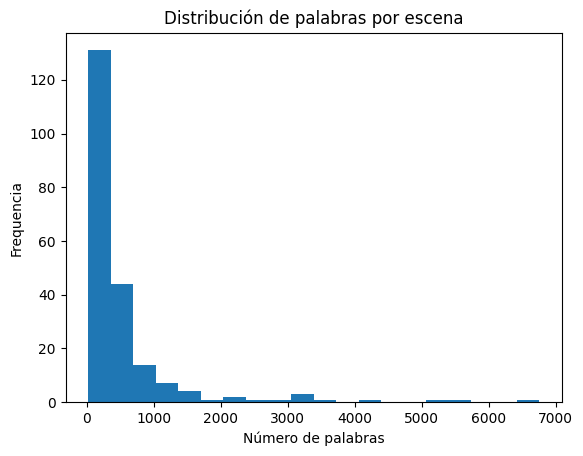

In [12]:
# Visualización: distribución de longitud de escenas
plt.hist(df['num_palabras'], bins=20)
plt.title("Distribución de palabras por escena")
plt.xlabel("Número de palabras")
plt.ylabel("Frequencia")
plt.show()

## Clasificación automática de emociones por escena

In [ ]:
from huggingface_hub import login
login('TOKEN')

c:\Users\ganod\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
from transformers import pipeline
from deep_translator import GoogleTranslator

emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base', top_k=1, device=-1)
translator = GoogleTranslator(source='es', target='en')

def detectar_emocion(texto):
    try:
        oraciones = re.split(r'[.!?]', texto)
        entrada = ' '.join(oraciones[:5]).strip()[:300]
        entrada_en = translator.translate(entrada)
        result = emotion_classifier(entrada_en)
        return result[0][0].get('label', 'desconocido')
    except Exception as e:
        print(f'Error:', e)
        return 'desconocido'
    
df['emocion'] = df['escena_texto'].apply(detectar_emocion)
df[['escena_texto', 'emocion']].head()

Device set to use cpu


,escena_texto,emocion
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,neutral
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,anger
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",joy
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",joy
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,fear


In [15]:
df['emocion'].value_counts()

emocion
fear       106
joy         39
neutral     21
sadness     20
anger       15
disgust     12
Name: count, dtype: int64

## Clustering temático con Sentence Transformers

In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

model = SentenceTransformer('distiluse-base-multilingual-cased-v1', device='cpu')
embeddings = model.encode(df['escena_texto'].tolist())
kmeans = KMeans(n_clusters=5, random_state=42)
df['tema_cluster'] = kmeans.fit_predict(embeddings)
df[['tema_cluster', 'escena_texto']].groupby('tema_cluster').head(1)

,tema_cluster,escena_texto
0,3,Los Californios\n1\nAutor. Carlos Peralta Dávi...
1,1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...
3,2,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta..."
14,4,FRENTE IGLESIA – TUBAC SONORA – DÍA\n\nSOBREPU...
18,0,"CASA DE LA FAMILIA – CONTINUA\n\n\nLa HIJA, es..."


## Matriz de coaparición de personajes

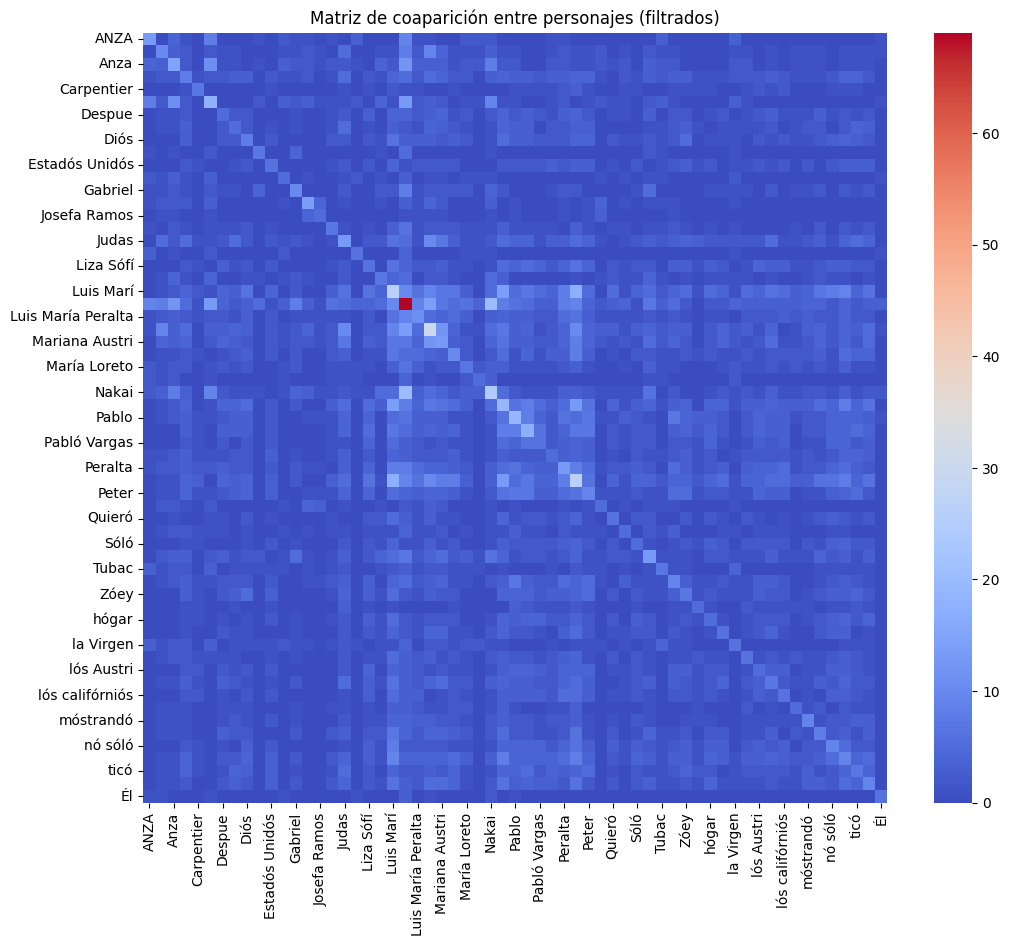

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
personajes_bin = mlb.fit_transform(df['personajes_filtrados'])
df_personajes = pd.DataFrame(personajes_bin, columns=mlb.classes_)
coaparicion = df_personajes.T.dot(df_personajes)
plt.figure(figsize=(12, 10))
sns.heatmap(coaparicion, cmap="coolwarm", annot=False)
plt.title("Matriz de coaparición entre personajes (filtrados)")
plt.show()

## Limpieza y tratamiento de valores nulos o atípicos

In [18]:
df['escena_text'] = df['escena_texto'].str.strip()
print('Valores nulos por columna: ')
print(df.isnull().sum())
df.fillna("desconocido", inplace=True)

Valores nulos por columna: 
escena_texto            0
num_palabras            0
doc                     0
personajes              0
personajes_filtrados    0
emocion                 0
tema_cluster            0
escena_text             0
dtype: int64


## Conclusiones del Análisis Exploratorio

In [19]:
print('Total de escenas:')
print(len(df))

Total de escenas:
213


In [20]:
print('\nEscenas más extensas:')
print(df.sort_values(by='num_palabras', ascending=False).head(5)[['num_palabras', 'escena_texto']])


Escenas más extensas:
     num_palabras                                       escena_texto
169          6755  MUELLE DEL RANCHO SAN ANTONIO – EAST BAY- DÍA\...
0            5665  Los Californios\n1\nAutor. Carlos Peralta Dávi...
160          5272  CASA GUBERNATORIAL - SALÓN PRINCIPAL - NOCHE\n...
167          4326  MOANING CAVERN - NOCHE\n \nVisual: La entrada ...
185          3417  ÁREA DESOLADA EN EL CENTRO DE SAN FRANCISCO - ...


In [21]:
print('\nDistribución de emociones:')
print(df['emocion'].value_counts())


Distribución de emociones:
emocion
fear       106
joy         39
neutral     21
sadness     20
anger       15
disgust     12
Name: count, dtype: int64


In [22]:
print('\nTop personajes:')
print(df['personajes_filtrados'].explode().value_counts().head(10))


Top personajes:
personajes_filtrados
Luis María    69
Mariana       30
Luis Marí     26
Peró          26
Nakai         24
Pablo         19
Nó            19
De Anza       18
Pabló         17
Anza          15
Name: count, dtype: int64


In [23]:
# Calcular datos necesarios para el dashboard

# Escenas por personaje (Top 10)
personajes_escenas = df['personajes_filtrados'].explode().value_counts().head(10)

# Emociones detectadas
emociones = df['emocion'].value_counts()

# Clusters temáticos (si existe esa columna)
if 'tema_cluster' in df.columns:
    temas = df['tema_cluster'].value_counts().sort_index()
else:
    temas = pd.Series()


C:\Users\ganod\AppData\Local\Temp\ipykernel_10896\497292836.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emociones.values, y=emociones.index, ax=axs[0, 1], palette="pastel")
C:\Users\ganod\AppData\Local\Temp\ipykernel_10896\497292836.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temas.index, y=temas.values, ax=axs[1, 0], palette="muted")


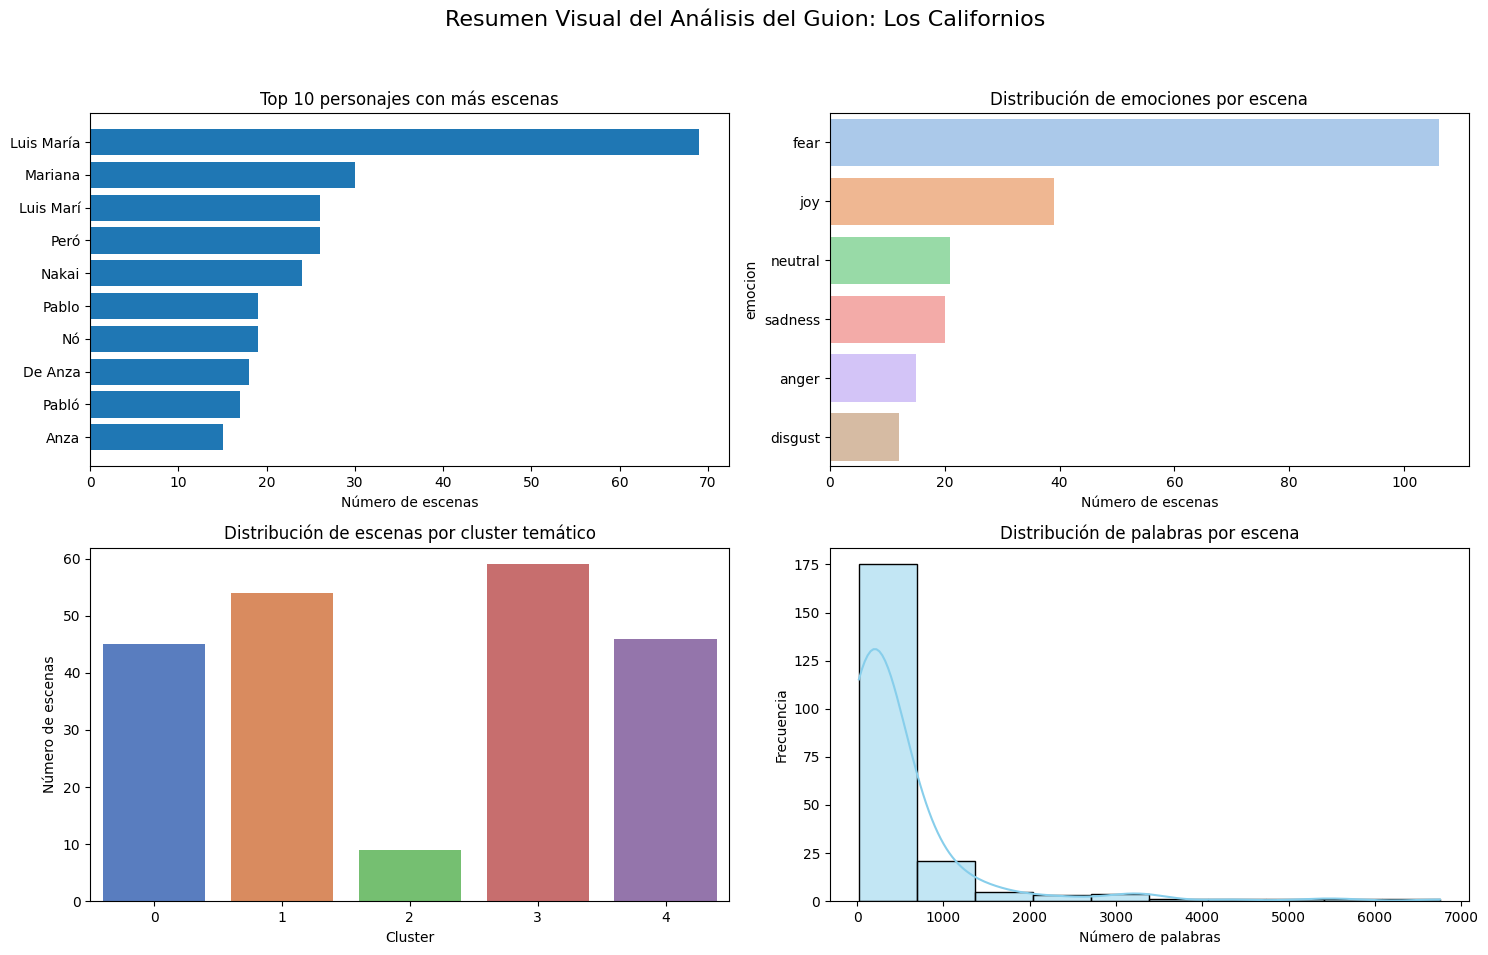

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Resumen Visual del Análisis del Guion: Los Californios", fontsize=16)

# Gráfico 1: Top personajes
axs[0, 0].barh(personajes_escenas.index[::-1], personajes_escenas.values[::-1])
axs[0, 0].set_title("Top 10 personajes con más escenas")
axs[0, 0].set_xlabel("Número de escenas")

# Gráfico 2: Emociones
sns.barplot(x=emociones.values, y=emociones.index, ax=axs[0, 1], palette="pastel")
axs[0, 1].set_title("Distribución de emociones por escena")
axs[0, 1].set_xlabel("Número de escenas")

# Gráfico 3: Clusters temáticos
sns.barplot(x=temas.index, y=temas.values, ax=axs[1, 0], palette="muted")
axs[1, 0].set_title("Distribución de escenas por cluster temático")
axs[1, 0].set_xlabel("Cluster")
axs[1, 0].set_ylabel("Número de escenas")

# Gráfico 4: Longitud de escenas
sns.histplot(df['num_palabras'], bins=10, kde=True, ax=axs[1, 1], color='skyblue')
axs[1, 1].set_title("Distribución de palabras por escena")
axs[1, 1].set_xlabel("Número de palabras")
axs[1, 1].set_ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Maestría en Inteligencia Artificial Aplicada 

## Curso: Proyecto Integrador (Grupo 10) 

## Avance 2. Ingeniería de características
<br />

### Profesor titular  
#### Dra. Grettel Barceló Alonso 
#### Dr. Luis Eduardo Falcón Morales  
<br />

<table>
<tr>
    <th colspan="2">Equipo 19: Los Californios I</th>
</tr>
<tr>
    <td>Ernesto Zapata Garza</td><td>A00915255</td>
</tr>
<tr>
    <td>Rafael García Domínguez</td><td>A01328974</td>
</tr>
<tr>
    <td>Erik López Hernández</td><td>A00458875</td>
</tr>
</table>
<br />

##### 11 de mayo de 2025

## Importación de paquetes necesarios

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

## Generación y codificación de nuevas características

In [26]:
df = pd.concat([df, pd.get_dummies(df['emocion'], prefix='em')], axis=1)
df['num_personajes'] = df['personajes_filtrados'].apply(len)
df['escena_coral'] = (df['num_personajes'] > 1).astype(int)
df.head()

,escena_texto,num_palabras,doc,personajes,personajes_filtrados,emocion,tema_cluster,escena_text,em_anger,em_disgust,em_fear,em_joy,em_neutral,em_sadness,num_personajes,escena_coral
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,5665,"(Los, Californios, \n, 1, \n, Autor, ., Carlos...","[Juan Bautista, Josefa Ramos, De Anza, Vladimi...","[Josefa Ramos, De Anza, Aldara, Pablo, Queréta...",neutral,3,Los Californios\n1\nAutor. Carlos Peralta Dávi...,False,False,False,False,True,False,15,1
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,594,"(DESIERTO, DE, SONORA, Y, ARIZONA, –, AMANECER...",[Californios],[],anger,1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,True,False,False,False,False,False,0,0
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",1069,"(2465, 34TH, AVE, ,, OAKLAND, –, DÍA, \n\n\n, ...","[Tiburcio Vásquez, Sophie, Vestida, Peralta, O...","[Peralta, Zoey, Luis María, San Antonio, Pablo]",joy,3,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",False,False,False,True,False,False,5,1
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",187,"(MARKET, STREET, ,, SAN, FRANCISCO, -, DÍA, \n...","[Distinguished Californian, Luis María, Luis M...",[Luis María],joy,2,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",False,False,False,True,False,False,1,0
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,97,"(CALIFORNIA, STREET, SAN, FRANCISCO-, DÍA, \n\...",[],[],fear,2,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,False,False,True,False,False,False,0,0


## Normalización de variables numéricas

In [27]:
scaler = MinMaxScaler()
df[['norm_longitud', 'norm_personajes']] = scaler.fit_transform(df[['num_palabras', 'num_personajes']])
df.head()

,escena_texto,num_palabras,doc,personajes,personajes_filtrados,emocion,tema_cluster,escena_text,em_anger,em_disgust,em_fear,em_joy,em_neutral,em_sadness,num_personajes,escena_coral,norm_longitud,norm_personajes
0,Los Californios\n1\nAutor. Carlos Peralta Dávi...,5665,"(Los, Californios, \n, 1, \n, Autor, ., Carlos...","[Juan Bautista, Josefa Ramos, De Anza, Vladimi...","[Josefa Ramos, De Anza, Aldara, Pablo, Queréta...",neutral,3,Los Californios\n1\nAutor. Carlos Peralta Dávi...,False,False,False,False,True,False,15,1,0.838135,0.535714
1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,594,"(DESIERTO, DE, SONORA, Y, ARIZONA, –, AMANECER...",[Californios],[],anger,1,DESIERTO DE SONORA Y ARIZONA – AMANECER\n\nImá...,True,False,False,False,False,False,0,0,0.085091,0.000000
2,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",1069,"(2465, 34TH, AVE, ,, OAKLAND, –, DÍA, \n\n\n, ...","[Tiburcio Vásquez, Sophie, Vestida, Peralta, O...","[Peralta, Zoey, Luis María, San Antonio, Pablo]",joy,3,"2465 34TH AVE, OAKLAND – DÍA\n\n\nSOBREPUESTO\...",False,False,False,True,False,False,5,1,0.155628,0.178571
3,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",187,"(MARKET, STREET, ,, SAN, FRANCISCO, -, DÍA, \n...","[Distinguished Californian, Luis María, Luis M...",[Luis María],joy,2,"MARKET STREET, SAN FRANCISCO - DÍA\nLa carreta...",False,False,False,True,False,False,1,0,0.024651,0.035714
4,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,97,"(CALIFORNIA, STREET, SAN, FRANCISCO-, DÍA, \n\...",[],[],fear,2,CALIFORNIA STREET SAN FRANCISCO- DÍA\n\n\nLa c...,False,False,True,False,False,False,0,0,0.011286,0.000000


## Selección y reducción de características

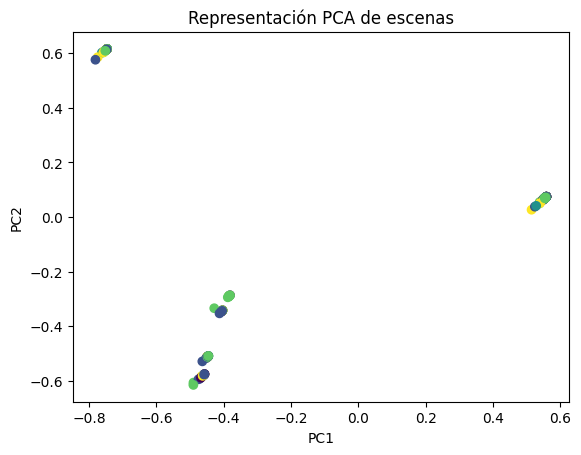

In [28]:
columnas_emocion = list(df.columns[df.columns.str.startswith('em_')])
X = df[['norm_longitud', 'norm_personajes'] + columnas_emocion]

selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['tema_cluster'], cmap='viridis')
plt.title('Representación PCA de escenas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Conclusiones

In [29]:
print("- Se generaron variables relevantes como longitud, número de personajes y emociones codificadas.")
print("- Se aplicó normalización min-max y PCA para representar la distribución temática de escenas.")
print("- Esta ingeniería de características permite reducir la complejidad del sistema y mejora la preparación de datos para la generación automatizada de tráileres usando IA.")

- Se generaron variables relevantes como longitud, número de personajes y emociones codificadas.
- Se aplicó normalización min-max y PCA para representar la distribución temática de escenas.
- Esta ingeniería de características permite reducir la complejidad del sistema y mejora la preparación de datos para la generación automatizada de tráileres usando IA.


## Benchmark de herramientas de generación audiovisual

In [30]:
# Comparativa subjetiva y técnica entre herramientas de IA para video
benchmark_ia_video = pd.DataFrame({
    'Herramienta': ['Pika Labs', 'Runway ML', 'Sora (OpenAI)', 'Kaiber AI'],
    'Estilo visual': ['Cinemático', 'Realista/Estilizado', 'Ultra realista', 'Animado/Creativo'],
    'Velocidad': ['Rápido', 'Moderado', 'Desconocido (beta)', 'Rápido'],
    'Facilidad de uso': ['Alta', 'Media', 'N/A', 'Alta'],
    'Control de cámara': ['Sí', 'Parcial', 'Sí (avanzado)', 'Limitado'],
    'Uso para tráiler': ['Sí', 'Sí', 'Sí (futuro)', 'Sí']
})
benchmark_ia_video

,Herramienta,Estilo visual,Velocidad,Facilidad de uso,Control de cámara,Uso para tráiler
0,Pika Labs,Cinemático,Rápido,Alta,Sí,Sí
1,Runway ML,Realista/Estilizado,Moderado,Media,Parcial,Sí
2,Sora (OpenAI),Ultra realista,Desconocido (beta),N/A,Sí (avanzado),Sí (futuro)
3,Kaiber AI,Animado/Creativo,Rápido,Alta,Limitado,Sí


## Comparativa de calidad de voz sintética

In [31]:
voz_ia = pd.DataFrame({
    'Plataforma': ['ElevenLabs', 'Play.ht', 'Coqui.ai'],
    'Naturaleza de la voz': ['Muy natural', 'Natural', 'Moderadamente natural'],
    'Idiomas soportados': ['Multilingüe (clonado)', 'Multilingüe', 'Limitado'],
    'Control emocional': ['Sí (muy bueno)', 'Limitado', 'Bueno'],
    'Aplicación para tráiler': ['Ideal', 'Funcional', 'Limitada']
})
voz_ia

,Plataforma,Naturaleza de la voz,Idiomas soportados,Control emocional,Aplicación para tráiler
0,ElevenLabs,Muy natural,Multilingüe (clonado),Sí (muy bueno),Ideal
1,Play.ht,Natural,Multilingüe,Limitado,Funcional
2,Coqui.ai,Moderadamente natural,Limitado,Bueno,Limitada


## Simulación de storyboard con generación visual

In [32]:
# Evaluación subjetiva de resultados generados por IA para storyboard
storyboard_eval = pd.DataFrame({
    'Escena': ['Encuentro en la misión', 'Huida en la costa', 'Confrontación en la plaza'],
    'Imagen IA (estilo)': ['Pika Labs - cinematográfico', 'Kaiber - animado', 'Runway - realista'],
    'Claridad visual': ['Alta', 'Media', 'Alta'],
    'Correspondencia emocional': ['Buena', 'Aceptable', 'Muy buena'],
    'Elección final': ['Sí', 'No', 'Sí']
})
storyboard_eval

,Escena,Imagen IA (estilo),Claridad visual,Correspondencia emocional,Elección final
0,Encuentro en la misión,Pika Labs - cinematográfico,Alta,Buena,Sí
1,Huida en la costa,Kaiber - animado,Media,Aceptable,No
2,Confrontación en la plaza,Runway - realista,Alta,Muy buena,Sí


## Similitud entre escenas y personajes con embeddings

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Se extraen las escenas y se generan nombres de escenas
escenas = df['escena_texto'].tolist()
nombres_escenas = [f'Escena {i+1}' for i in range(len(escenas))]

# Se carga el modelo y se generan los embeddings
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
embeddings = model.encode(escenas)

# Se calcula matriz de similitud
sim_matrix = cosine_similarity(embeddings)

# Se genera un dataframe temporal para desplegar los resultados de forma legible.
df_sim = pd.DataFrame(sim_matrix, index=nombres_escenas, columns=nombres_escenas)

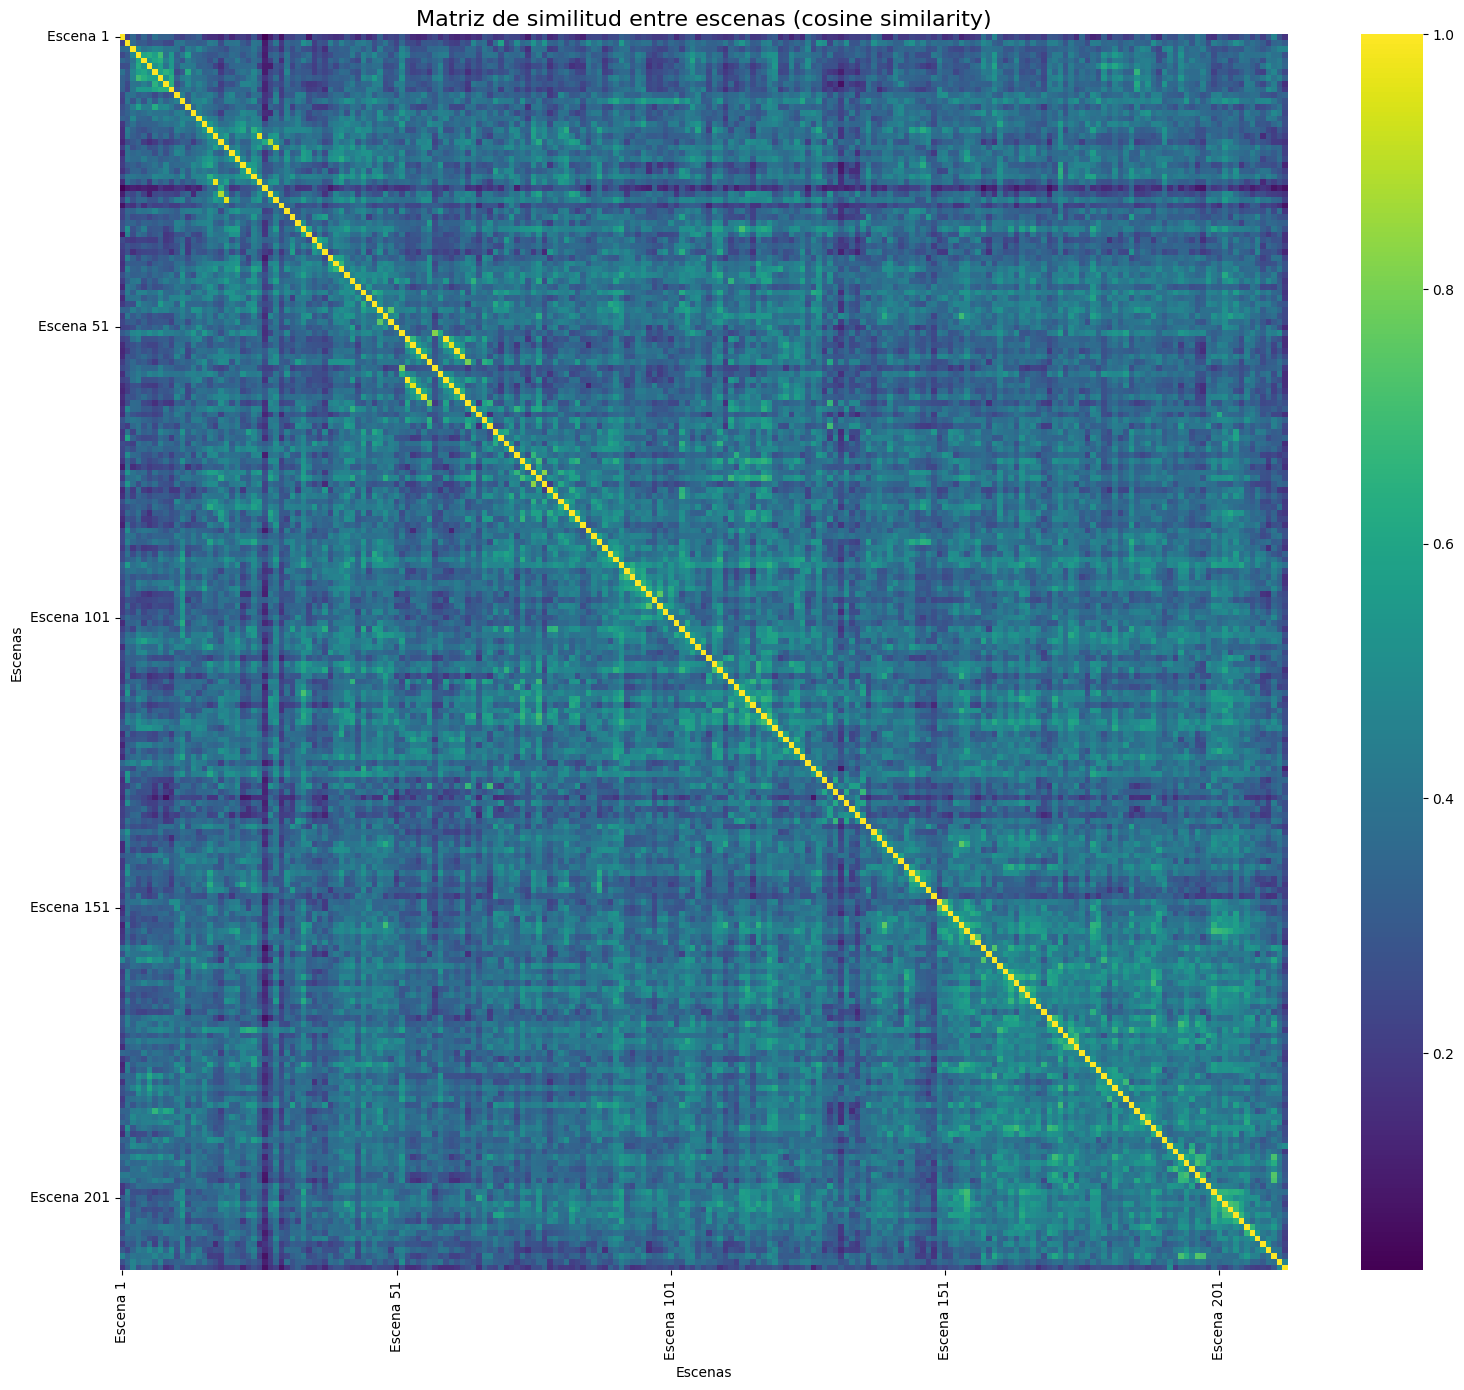

In [34]:
# Mostrar heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(df_sim, cmap='viridis', xticklabels=50, yticklabels=50)
plt.title('Matriz de similitud entre escenas (cosine similarity)', fontsize=16)
plt.xlabel('Escenas')
plt.ylabel('Escenas')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
df_sim.head()

,Escena 1,Escena 2,Escena 3,Escena 4,Escena 5,Escena 6,Escena 7,Escena 8,Escena 9,Escena 10,...,Escena 204,Escena 205,Escena 206,Escena 207,Escena 208,Escena 209,Escena 210,Escena 211,Escena 212,Escena 213
Escena 1,1.000000,0.219017,0.350571,0.244191,0.347477,0.255090,0.391077,0.326674,0.329022,0.319733,...,0.226157,0.277201,0.315167,0.233921,0.303555,0.204605,0.297953,0.465367,0.268768,0.175639
Escena 2,0.219017,1.000000,0.364505,0.299904,0.308955,0.263217,0.288890,0.287585,0.242536,0.232874,...,0.512736,0.453377,0.344170,0.390485,0.350536,0.316402,0.229644,0.341235,0.356859,0.308680
Escena 3,0.350571,0.364505,1.000000,0.482360,0.396145,0.427048,0.472874,0.456257,0.402155,0.412238,...,0.304081,0.292898,0.396285,0.369340,0.335414,0.297865,0.343047,0.405982,0.465828,0.462215
Escena 4,0.244191,0.299904,0.482360,1.000000,0.603322,0.631287,0.574541,0.698726,0.397078,0.547409,...,0.334953,0.420534,0.386112,0.391433,0.387026,0.396126,0.437613,0.389703,0.396980,0.274518
Escena 5,0.347477,0.308955,0.396145,0.603322,1.000000,0.535473,0.603800,0.637248,0.446892,0.547202,...,0.298862,0.405250,0.388712,0.322029,0.350353,0.262849,0.412678,0.401616,0.435544,0.334516


In [36]:
import numpy as np
# Convertir la matriz en formato largo (pares de escena)
sim_pairs = df_sim.where(~np.eye(df_sim.shape[0], dtype=bool))  # Elimina la diagonal (1.0 de autocomparación)
sim_pairs = sim_pairs.stack().reset_index()
sim_pairs.columns = ['Escena A', 'Escena B', 'Similaridad']

# Ordenar de mayor a menor
sim_pairs = sim_pairs.sort_values(by='Similaridad', ascending=False)

# Opcional: eliminar duplicados (Ej: A-B y B-A)
sim_pairs['Escenas'] = sim_pairs[['Escena A', 'Escena B']].apply(lambda x: tuple(sorted(x)), axis=1)
sim_pairs = sim_pairs.drop_duplicates(subset='Escenas').drop(columns='Escenas')

# Mostrar top 10 pares más similares
print('10 escenas con mayor similitud:')
sim_pairs.head(10)

10 escenas con mayor similitud:


,Escena A,Escena B,Similaridad
12986,Escena 62,Escena 55,1.000000
11082,Escena 53,Escena 60,1.000000
5317,Escena 26,Escena 18,0.979297
11721,Escena 56,Escena 63,0.977420
11295,Escena 54,Escena 61,0.963691
4055,Escena 20,Escena 29,0.960901
5742,Escena 28,Escena 19,0.879462
15976,Escena 76,Escena 78,0.827906
10868,Escena 52,Escena 58,0.817077
13412,Escena 64,Escena 57,0.798230
